Oppgave 7.1

In [49]:
# 1A

import pandas as pd
import sympy as sp
import numpy as np

# Importerer dataframe
df = pd.read_csv("https://uit-sok-1006-v23.github.io/data/suits_watermelons.csv", delimiter=";")

# Konverterer verdiene for P og Q til faktiske verdier
df['Q'] = np.exp(df['log q'])
df['P'] = np.exp(df['log p'])

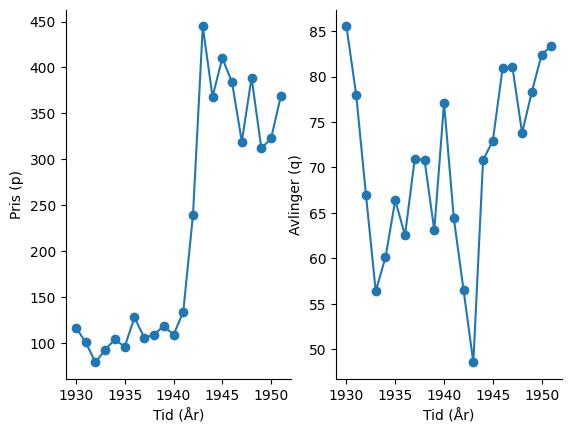

In [50]:
# 1B

from matplotlib import pyplot as plt

# Lager et plot med to grafer
def create_axs2():
    fig, axs = plt.subplots(1,2)
    for i in range(2):
        axs[i].spines['top'].set_color('none')
        axs[i].spines['right'].set_color('none')
    return fig, axs

# Tegner plot
fig, axs = create_axs2()

# Lager labels
axs[0].set_ylabel("Pris (p)")
axs[0].set_xlabel("Tid (År)")
axs[1].set_ylabel("Avlinger (q)")
axs[1].set_xlabel("Tid (År)")

# Legger inn verdiene for Q og P
axs[0].plot(df["Year"],df["P"], marker="o")
axs[1].plot(df["Year"],df["Q"], marker="o")

In [51]:
# 2A

# Genererer tall mellom 20 og 100 med 17 mellomrom
q = np.linspace(20,100,17)

# Lager en tom dataframe
df2 = pd.DataFrame()

# Legger til kolonnen Q
df2["Q"] = pd.DataFrame(q)

In [52]:
# 2B

# Lager en variabel for å logaritmen til Q
log_q = np.log(q)

# Legger inn alle ulike verdier i kolonnene
df2["Log Q"] = log_q
df2["Supply (log P)"] = supply_log = -2.0 + 1.7*log_q
df2["Demand (log P)"] = demand_log = 8.5 - 0.82*log_q
df2["Supply (P)"] = np.exp(supply_log)
df2["Demand (P)"] = np.exp(demand_log)

df2

,Q,Log Q,Supply (log P),Demand (log P),Supply (P),Demand (P)
0,20.0,2.995732,3.092745,6.043500,22.037485,421.365040
1,25.0,3.218876,3.472089,5.860522,32.203943,350.907208
2,30.0,3.401197,3.782036,5.711018,43.905322,302.178574
3,35.0,3.555348,4.044092,5.584615,57.059336,266.297629
4,40.0,3.688879,4.271095,5.475119,71.600000,238.678832
5,45.0,3.806662,4.471326,5.378537,87.472655,216.704952
6,50.0,3.912023,4.650439,5.292141,104.630920,198.768561
7,55.0,4.007333,4.812466,5.213987,123.034698,183.825472
8,60.0,4.094345,4.960386,5.142637,142.648813,171.166618
9,65.0,4.174387,5.096458,5.077002,163.442028,160.292847


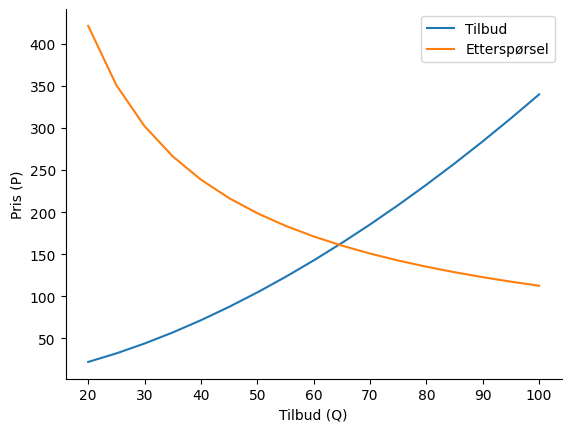

In [53]:
#2C

#Definerer plot
def create_ax():
    fig, ax = plt.subplots()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')

    return fig, ax

# Tegner plot
fig, ax = create_ax()

# Lager labels
ax.set_ylabel("Pris (P)")
ax.set_xlabel("Tilbud (Q)")

# Tegner tilbud og etterspørsel på samme plot
ax.plot(df2["Q"],df2["Supply (P)"], label="Tilbud")
ax.plot(df2["Q"],df2["Demand (P)"], label="Etterspørsel")

# Legger til legend
ax.legend(loc="upper right")


array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

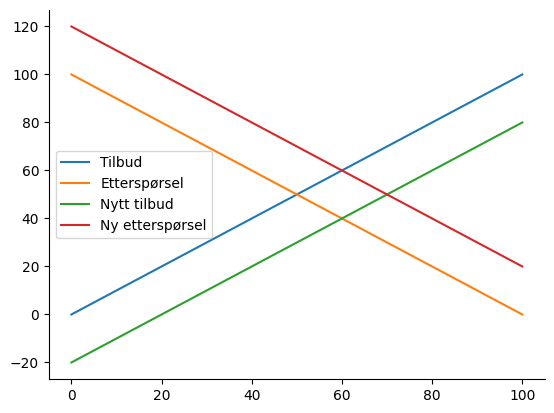

In [54]:
#Tegner en hvordan et shock påvirker tilbud/etterspørsel

df3 = pd.DataFrame()

x = np.linspace(0,100,101)

supply = x

demand = 100-x

shock_supply = x - 20

shock_demand = 120 - x


fig, ax = create_ax()

ax.plot(x,supply, label="Tilbud")
ax.plot(x,demand, label="Etterspørsel")
ax.plot(x,shock_supply, label="Nytt tilbud")
ax.plot(x,shock_demand, label="Ny etterspørsel")

ax.legend(loc="best")

x

Text(0.5, 0, 'Tilbud (Q)')

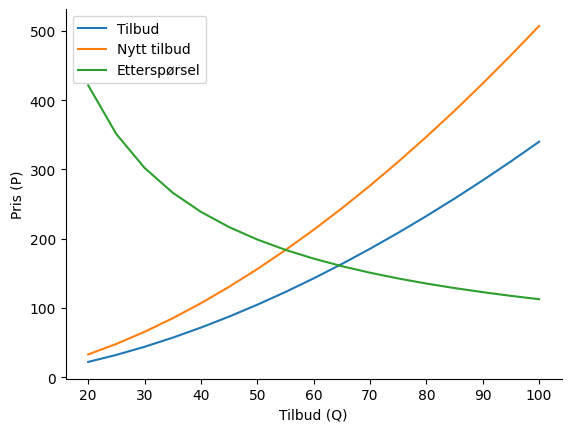

In [55]:
#3A

#Legger til nytt tilbud i dataframe
df2["New Supply (log P)"] = new_supply = -2.0 + 1.7 * log_q + 0.4

#Legger til nytt tilbud omgjort til priser i dollar
df2["New Supply (P)"] = np.exp(new_supply)

#tegner plot
fig, ax = create_ax()

# Tegner grafene
ax.plot(df2["Q"],df2["Supply (P)"], label="Tilbud")
ax.plot(df2["Q"],df2["New Supply (P)"], label="Nytt tilbud")
ax.plot(df2["Q"],df2["Demand (P)"], label="Etterspørsel")

# Legger til legend
ax.legend(loc="best")

# Lager labels
ax.set_ylabel("Pris (P)")
ax.set_xlabel("Tilbud (Q)")


Oppgave 7.2

In [56]:
#1A 
#


p, q = sp.symbols('p, q', real=True, positive=True)

supply_eq = sp.Eq(-2+1.7*sp.log(q),sp.log(p))

#regner ut løsning
sp.solve(eq,sp.log(q))

# Priselastisiteten for tilbud er 0.59, den er derfor uelastisk

[10.3658536585366 - 1.21951219512195*log(p)]

In [57]:
#1B

p, q = sp.symbols('p, q', real=True, positive=True)

demand_eq = sp.Eq(8.5-0.82*sp.log(q),sp.log(p))

#regner ut løsning
sp.solve(eq,sp.log(q))

# Priselastisiteten for etterspøsel er 1.22, den er derfor elastisk

[10.3658536585366 - 1.21951219512195*log(p)]

Oppgave 7.2.2

P = Prisen for vannmeloner har en positiv koeffisient som tilsier at prisen er elastisk. Da er mer vannmeloner på markedet en det som trengs

C = Prisen for bomull har en negativ koeffisient. Dette vil si at det er større etterspørsel for bomull enn det som tilbyderne produserer.  

CP = Bomull programmet var for å beskytte bomullprisene, ved å begrense produksjon. koeffisienten er positiv. Derfor er det likevel mer bomull på markedet enn det som etterspørs

WW2 = Dette er en kunstig variable, skulle USA gå i krig. Koeffisienten er negativ, siden derfor er det sansynlig at tilbudet gikk ned under krigen

Oppgave 7.2.3

P = Prisen for vannmelon har en negativ koeffisient for etterspørselen.

Y/N = Inntekt per inbygger har en positiv koefficient, derfor var det etterspørsel for vannmeloner

F = Fraktkostnader ved tog har en negativ koeffisient. Etterspørselen gikk derfor ned.

Oppgave 7.2.4

1. Hvis konsumentene leser i avsier at vannmeloner er kreftfremkallende, så kan dette ha en konsekvens for tilbud og etterspørsel av vannmeloner, og endre vanene til konsumenter

2. Hvis værforholdene forandrer seg i områder der vannmeloner produseres, kan dette få negative konsekvenser for produksjonen av vannmeloner.